In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.1 MB/s eta 0:00:00


In [3]:
from transformers import pipeline
classifier1 = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Work/Bornbhukkad/del/csv/100N.csv')
data.head()

,Reviews
0,good food
1,Tasty and fresh! Very good portion size! Enjoy...
2,omlette and sauteed veggies were good. bread w...
3,Very nicely done..loved the custard fruit bowl...
4,"Requested not to add onions, however it was no..."


In [6]:
#cleaning text data
data["cleaned_review"] = data["Reviews"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x).lower())
data.head()

,Reviews,cleaned_review
0,good food,good food
1,Tasty and fresh! Very good portion size! Enjoy...,tasty and fresh very good portion size enjoyed...
2,omlette and sauteed veggies were good. bread w...,omlette and sauteed veggies were good bread wa...
3,Very nicely done..loved the custard fruit bowl...,very nicely doneloved the custard fruit bowl
4,"Requested not to add onions, however it was no...",requested not to add onions however it was not...


In [7]:
#converting cleaned data to list
data_list = []

for i in range(len(data)):
    data_list.append(data.loc[i,"cleaned_review"])

In [8]:
#performing sentiment-analysis
result = []

for i in data_list:
  result.append(classifier1(i))

final_sentiment = []

for i in range(len(result)):
  final_sentiment.append(result[i][0]['label'])

data['SENTIMENT'] = final_sentiment

data.head()

,Reviews,cleaned_review,SENTIMENT
0,good food,good food,POSITIVE
1,Tasty and fresh! Very good portion size! Enjoy...,tasty and fresh very good portion size enjoyed...,POSITIVE
2,omlette and sauteed veggies were good. bread w...,omlette and sauteed veggies were good bread wa...,POSITIVE
3,Very nicely done..loved the custard fruit bowl...,very nicely doneloved the custard fruit bowl,POSITIVE
4,"Requested not to add onions, however it was no...",requested not to add onions however it was not...,NEGATIVE


In [9]:
prod_review = []

In [10]:
for i in range(len(data)):
  if (data['SENTIMENT'][i] == 'NEGATIVE'):
    prod_review.append(data['Reviews'][i])

In [11]:
from wordcloud import WordCloud

In [12]:
text = " ".join(word.split()[0] for word in prod_review)
text

"Requested need Worst Lettuce, I I club involve Worst If fruits Bread not food Zomato, less received The There Less bread expected should Quality You Bad Chicken Honestly there Even Too the Felt I it Best there Only please testy Stale The food There delivery sandwich Tasteless delivered Variety Salad I've Less rotten more delivery expensive, testy banna missed kiwi, description worst I I taste The testy Omelettes Definitely We more Fruits Paneer Worst taste food I'm Meal not strawberry Used I Toast Too horrible i they if Taste Spinach I Extremely portion The Chicken Don’t Gauva how disappointed Sandwich quality received fruit Club We #notvalyeformoney I The The Not custard It’s falafel The I Till Very The Not Fruits Not bit chicken taste I One there with grape Orange horrible weird very I custard item Pls U Food It no Fruits unhealthy received the Not tastes no waste I Because You worst please the not Bad No 🙏🙏🙏 muskmelon only not Went sent please Chicken Order Got not bread Waste Wate

In [13]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

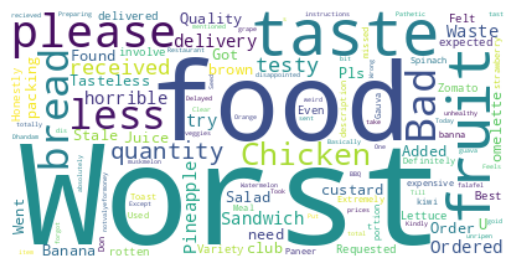

In [14]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()